<a href="https://colab.research.google.com/github/villasen/colab_notebooks/blob/master/Keras_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Urban dataset download and file structure setup for train, validation, and test

In [1]:
!git clone https://github.com/villasen/small-urban-sound-dataset.git

Cloning into 'small-urban-sound-dataset'...
remote: Enumerating objects: 9719, done.
remote: Counting objects: 100% (9719/9719), done.
remote: Compressing objects: 100% (9324/9324), done.
remote: Total 9719 (delta 398), reused 9713 (delta 394), pack-reused 0
Receiving objects: 100% (9719/9719), 259.08 MiB | 27.25 MiB/s, done.
Resolving deltas: 100% (398/398), done.
Checking out files: 100% (10185/10185), done.


In [0]:
!rm -r /content/small-urban-sound-dataset

In [0]:
!rm -r /content/target_npy_files/

In [2]:
#from preprocess import *
import keras
from keras import layers
from keras import models
from keras import backend as K
from keras import optimizers
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
import librosa
import tensorflow
import scipy
import os, shutil
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


target_dir = '/content/target_npy_files'
#DATA_PATH = "small-urban-sound-dataset/tiny-dataset/"
DATA_PATH = "small-urban-sound-dataset/combined_datasets/"
os.mkdir(target_dir)

def wav2mfcc(file_path, max_pad_len):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    mfcc = librosa.feature.mfcc(wave, sr=16000, n_mfcc=10, n_fft=640, hop_length=320)
    pad_width = max_pad_len - mfcc.shape[1]
    if pad_width < 0: 
      print(mfcc.shape[1])
      print(pad_width)
      print("error in "+ file_path)
    
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    return mfcc

  
  
def get_labels(path):
    labels = os.listdir(path) 
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)  



               
def save_data_to_array(path=DATA_PATH, max_pad_len=51):
    labels, _, _ = get_labels(path)

    for label in labels:
        # Init mfcc vectors
        mfcc_vectors = []

        wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
        for wavfile in wavfiles:
            if label == '_background_noise_' : break
            mfcc = wav2mfcc(wavfile, max_pad_len=max_pad_len)
            
            mfcc_vectors.append(mfcc)
        np.save('/content/target_npy_files/' + label + '.npy', mfcc_vectors)
        print(label)
        print(len(mfcc_vectors))
        

        

def get_train_test(split_ratio=0.9, random_state=42):
    # Get available labels
    labels, indices, _ = get_labels(DATA_PATH)

    # Getting first arrays
    X = np.load('/content/target_npy_files/' + labels[0] + '.npy')
    y = np.zeros(X.shape[0])

    
    # Append all of the dataset into one single array, same goes for y
    for i, label in enumerate(labels[1:]):
        x = np.load('/content/target_npy_files/' + label + '.npy')
        
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))
        
    assert X.shape[0] == len(y)

    return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)

  
  
  
save_data_to_array(path=DATA_PATH, max_pad_len=51)    
X_train, X_test, y_train, y_test = get_train_test()

X_train = X_train.reshape(X_train.shape[0], 10, 51, 1)
X_test = X_test.reshape(X_test.shape[0], 10, 51, 1)
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

Using TensorFlow backend.


sheep
40
sea_waves
40
train
40
airplane
40
water_drops
40
cat
40
pig
40
pouring_water
40
clapping
40
mouse_click
40
gun_shot
374
cow
40
clock_tick
40
chainsaw
40
car_horn
40
washing_machine
40
engine_idling
1000
clock_alarm
40
church_bells
40
insects
40
thunderstorm
40
laughing
40
hen
40
vacuum_cleaner
40
children_playing
1000
chirping_birds
40
air_conditioner
1000
rain
40
breathing
40
street_music
1000
sneezing
40
siren
929
keyboard_typing
40
toilet_flush
40
Helicopter
40
rooster
40
brushing_teeth
40
snoring
40
can_opening
40
dog_bark
1000
jackhammer
1000
wind
40
drilling
1000
coughing
40


In [0]:
  
#save_data_to_array(path=DATA_PATH, max_pad_len=51)    
X_train, X_test, y_train, y_test = get_train_test()

X_train = X_train.reshape(X_train.shape[0], 10, 51, 1)
X_test = X_test.reshape(X_test.shape[0], 10, 51, 1)
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [0]:
!rm -r /content/target_npy_files/*.npy

# Building DS-CNN model using Keras framework

Train on 8732 samples, validate on 971 samples
Epoch 1/200
8732/8732 [==============================] - 22s 3ms/step - loss: 3.1351 - acc: 0.1260 - val_loss: 2.8180 - val_acc: 0.1483
Epoch 2/200
8732/8732 [==============================] - 3s 360us/step - loss: 2.6889 - acc: 0.1869 - val_loss: 2.8642 - val_acc: 0.1380
Epoch 3/200
8732/8732 [==============================] - 3s 355us/step - loss: 2.5641 - acc: 0.2198 - val_loss: 2.8417 - val_acc: 0.1617
Epoch 4/200
8732/8732 [==============================] - 3s 356us/step - loss: 2.4820 - acc: 0.2447 - val_loss: 2.5561 - val_acc: 0.2235
Epoch 5/200
8732/8732 [==============================] - 3s 356us/step - loss: 2.3873 - acc: 0.2775 - val_loss: 2.3877 - val_acc: 0.2698
Epoch 6/200
8732/8732 [==============================] - 3s 358us/step - loss: 2.3189 - acc: 0.3004 - val_loss: 2.2099 - val_acc: 0.3378
Epoch 7/200
8732/8732 [==============================] - 3s 355us/step - loss: 2.2489 - acc: 0.3247 - val_loss: 2.5562 - val_acc: 0.

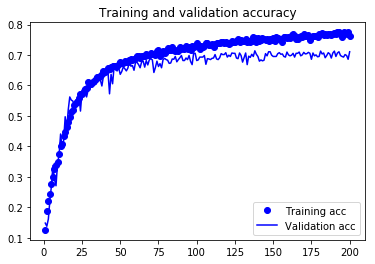

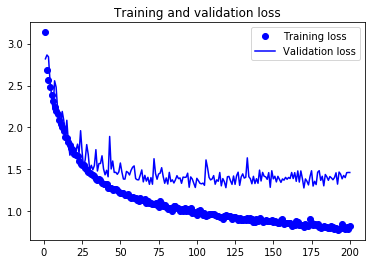

In [30]:
# Creating Keras sequential model
#bn = 1
BN=True
model = models.Sequential()

def dscnn_train():
  # 1
      model.add(layers.Conv2D(64, (4,10), strides=(2,2), padding='same', activation='relu', \
                #input_shape=(10, 49, 1)))
                input_shape=(10,51,1)))
      #model.add(layers.Dropout(0.5))
      if BN == True:
          model.add(layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, \
                                                center=True, scale=True, beta_initializer='zeros', \
                                                gamma_initializer='ones', moving_mean_initializer='zeros', \
                                                moving_variance_initializer='ones', beta_regularizer=None, \
                                                gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
      
      #model.add(layers.Dropout(0.5))
      model.add(layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0))
      #model.add(layers.Dropout(0.5))
      # 2
      model.add(layers.SeparableConv2D(64, (3,3), strides=(1,1), data_format='channels_last', padding='same', depth_multiplier=1, activation='relu'))  
      if BN == True:
          model.add(layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, \
                                              center=True, scale=True, beta_initializer='zeros', \
                                              gamma_initializer='ones', moving_mean_initializer='zeros', \
                                              moving_variance_initializer='ones', beta_regularizer=None, \
                                              gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
      #model.add(layers.Dropout(0.5))
      model.add(layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0))
      #model.add(layers.Dropout(0.5))

      model.add(layers.Conv2D(64, (1,1), strides=(1,1), padding='same', use_bias=False))
      if BN == True:
          model.add(layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, \
                                              center=True, scale=True, beta_initializer='zeros', \
                                              gamma_initializer='ones', moving_mean_initializer='zeros', \
                                              moving_variance_initializer='ones', beta_regularizer=None, \
                                              gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
     # model.add(layers.Dropout(0.5))
      model.add(layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0))
     # model.add(layers.Dropout(0.5))
      # 3
      model.add(layers.SeparableConv2D(64, (3,3), strides=(1,1), data_format='channels_last', padding='same', depth_multiplier=1, activation='relu'))
      if BN == True:
          model.add(layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, \
                                              center=True, scale=True, beta_initializer='zeros', \
                                              gamma_initializer='ones', moving_mean_initializer='zeros', \
                                              moving_variance_initializer='ones', beta_regularizer=None, \
                                              gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
      
      #model.add(layers.Dropout(0.5))
      model.add(layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0))
     # model.add(layers.Dropout(0.5))
      
      model.add(layers.Conv2D(64, (1,1), strides=(1,1), padding='same', use_bias=False))
      if BN == True:
          model.add(layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, \
                                              center=True, scale=True, beta_initializer='zeros', \
                                              gamma_initializer='ones', moving_mean_initializer='zeros', \
                                              moving_variance_initializer='ones', beta_regularizer=None, \
                                              gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
      #model.add(layers.Dropout(0.5))
      model.add(layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0))
      model.add(layers.Dropout(0.5))

      # 4
      model.add(layers.SeparableConv2D(64, (3,3), strides=(1,1), data_format='channels_last', padding='same', depth_multiplier=1, activation='relu'))
      if BN == True:
          model.add(layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, \
                                              center=True, scale=True, beta_initializer='zeros', \
                                              gamma_initializer='ones', moving_mean_initializer='zeros', \
                                              moving_variance_initializer='ones', beta_regularizer=None, \
                                              gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
      #model.add(layers.Dropout(0.5))
      model.add(layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0))
      model.add(layers.Dropout(0.5))
      model.add(layers.Conv2D(64, (1,1), strides=(1,1), padding='same', use_bias=False))
      if BN == True:
          model.add(layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, \
                                              center=True, scale=True, beta_initializer='zeros', \
                                              gamma_initializer='ones', moving_mean_initializer='zeros', \
                                              moving_variance_initializer='ones', beta_regularizer=None, \
                                              gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
      model.add(layers.Dropout(0.5))
      model.add(layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0))
      model.add(layers.Dropout(0.5))

      # 5
      model.add(layers.SeparableConv2D(64, (3,3), strides=(1,1), data_format='channels_last', padding='same', depth_multiplier=1, activation='relu'))
      if BN == True:
          model.add(layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, \
                                              center=True, scale=True, beta_initializer='zeros', \
                                              gamma_initializer='ones', moving_mean_initializer='zeros', \
                                              moving_variance_initializer='ones', beta_regularizer=None, \
                                              gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
      #model.add(layers.Dropout(0.5))
      model.add(layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0))
      model.add(layers.Dropout(0.5))
      model.add(layers.Conv2D(64, (1,1), strides=(1,1), padding='same', use_bias=False))
      if BN == True:      
          model.add(layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, \
                                              center=True, scale=True, beta_initializer='zeros', \
                                              gamma_initializer='ones', moving_mean_initializer='zeros', \
                                              moving_variance_initializer='ones', beta_regularizer=None, \
                                              gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
      #model.add(layers.Dropout(0.5))
      model.add(layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0))
      model.add(layers.Dropout(0.5))


      
           
      
# Final layer
      
      #model.add(layers.Dropout(0.5))
      model.add(layers.AveragePooling2D(pool_size=(5, 25), strides=(2,2), padding='valid', data_format=None))
      model.add(layers.Dropout(0.5))
      model.add(layers.Flatten(data_format=None))
     # model.add(layers.Dropout(0.5))
      model.add(layers.Dense(64, activation='relu'))
      model.add(layers.Dropout(0.5))
      #model.add(layers.Dense(12, activation='softmax'))
      model.add(layers.Dense(44, activation='softmax'))
      #model.add(layers.Dropout(0.5))
      # Compilation step to choose loss function, optimizer and metric
      # Configuring the learning process
      model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      #model.fit()
      history = model.fit(X_train, y_train_hot, batch_size=100, epochs=200, verbose=1, validation_data=(X_test, y_test_hot))
      
      #plt.plot(history.history['acc'])
      #Restarts layer sequence number 
      #K.clear_session()

      acc = history.history['acc']
      val_acc = history.history['val_acc']
      loss = history.history['loss']
      val_loss = history.history['val_loss']
      epochs = range(1, len(acc) + 1)
      
      plt.plot(epochs, acc, 'bo', label='Training acc')
      plt.plot(epochs, val_acc, 'b', label='Validation acc')
      plt.title('Training and validation accuracy')
      plt.legend()

      plt.figure()

      plt.plot(epochs, loss, 'bo', label='Training loss')
      plt.plot(epochs,val_loss, 'b', label='Validation loss')
      plt.title('Training and validation loss')
      plt.legend()
      plt.show()
      
  
dscnn_train()  

###Save Model

---



In [0]:
model.save('urban_sound.h5')

In [0]:
model.summary()

In [0]:

plt.plot(history.history['acc'])

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

In [0]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



##Alternate folder train and test structure

In [0]:
sample = wav2mfcc('/content/small-urban-sound-dataset/tiny-dataset/crackling_fire/1-17150-A.wav')

#X_train = X_train.reshape(X_train.shape[0], 10, 51, 1)


In [0]:
print(sample.shape)

In [0]:
sample_reshape = sample.reshape(sample(10,51,1))

In [0]:
print(get_labels() [0] [np.argmax(model.predict(sample_reshape))])

In [0]:
model.summary()

In [0]:

base_directory ='/content/target_dataset/'
os.mkdir(base_directory)
train_dir = os.path.join(base_directory, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_directory, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_directory, 'test')
os.mkdir(test_dir)


In [0]:
original_dataset_dir = '/content/Sound-Datasets/combined_datasets/'

In [0]:
train_gunshot_dir = os.path.join(train_dir, 'gun_shot')
os.mkdir(train_gunshot_dir)
train_dogbark_dir = os.path.join(train_dir, 'dog_bark')
os.mkdir(train_dogbark_dir)

validation_gunshot_dir = os.path.join(validation_dir, 'gun_shot')
os.mkdir(validation_gunshot_dir)
validation_dogbark_dir = os.path.join(validation_dir, 'dog_bark')
os.mkdir(validation_dogbark_dir)

test_gunshot_dir = os.path.join(test_dir, 'gun_shot')
os.mkdir(test_gunshot_dir)
test_dogbark_dir = os.path.join(test_dir, 'dog_bark')
os.mkdir(test_dogbark_dir)


In [0]:
fnames_dog = os.listdir('/content/Sound-Datasets/combined_datasets/dog_bark')
fnames_gun = os.listdir('/content/Sound-Datasets/combined_datasets/gun_shot')
fnames = os.listdir('/content/Sound-Datasets/combined_datasets/dog_bark')

In [0]:
#print(fnames)
size = len(fnames)
train_percentage = 0.8
validation_percentage = 0.1
test_percentage = 0.1
print('train percentage = %f' %train_percentage)
train_size = int(round(size * (train_percentage)))
validation_size = int(round(size * (validation_percentage)))
test_size = int(round(size * (test_percentage)))
print(size)
print('train_size = %i' %train_size)
print('validation_size = %i' %validation_size)
print('test_size = %i' %test_size)
total = train_size + validation_size + test_size
print(total)

In [0]:


#os.chdir('/content/combined_datasets/dog_bark')
train_list=[]
validation_list=[]
test_list=[]

train_list = fnames[0:train_size]
validation_list = fnames[train_size:train_size+validation_size]
test_list = fnames[train_size+validation_size:total]


for train in train_list:
  src_train = os.path.join(original_dataset_dir+'dog_bark', train )
  dst_train = os.path.join('/content/target_dataset/train/dog_bark', train)
  shutil.copyfile(src_train, dst_train)

for validation in validation_list:
  src_validation = os.path.join(original_dataset_dir+'dog_bark', validation)
  dst_validation = os.path.join('/content/target_dataset/validation/dog_bark', validation)
  shutil.copyfile(src_validation, dst_validation)
  
for test in test_list:
  src_test = os.path.join(original_dataset_dir+'dog_bark', test)
  dst_test = os.path.join('/content/target_dataset/test/dog_bark', test)
  shutil.copyfile(src_test, dst_test)
  
        
  

In [0]:
fnames_train = os.listdir('/content/target_dataset/train/dog_bark')
print(len(fnames_train))
fnames_val = os.listdir('/content/target_dataset/validation/dog_bark')
print(len(fnames_val))
fnames_test = os.listdir('/content/target_dataset/test/dog_bark')
print(len(fnames_test))


In [0]:
validation_gunshot_dir = os.path.join(validation_dir, 'gun_shot')
os.mkdir(validation_gunshot_dir)
validation_dogbark_dir = os.path.join(validation_dir, 'dog_bark')
os.mkdir(validation_dogbark_dir)

In [0]:
test_gunshot_dir = os.path.join(test_dir, 'gun_shot')
os.mkdir(test_gunshot_dir)
test_dogbark_dir = os.path.join(test_dir, 'dog_bark')
os.mkdir(test_dogbark_dir)

###Preparing for google speech dataset


In [0]:
data_url='http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz'
os.makedirs(dest_directory)
filename = data_url.split('/')[-1]
filepath = os.path.join(dest_directory, filename)

print(filename)
print(filepath)
 
def _progress(count, block_size, total_size):
    sys.stdout.write('\r>> Downloading %s %.1f%%' % \
            (filename, float(count * block_size) / float(total_size) * 100.0)) 
    sys.stdout.flush()

urban_dataset_dir = '/content/combined_datasets/' 


In [0]:
filepath, _ = urllib.request.urlretrieve(data_url, filepath, _progress)
statinfo = os.stat(filepath)
tf.logging.info('Successfully downloaded %s (%d bytes)', filename, statinfo.st_size)
tarfile.open(filepath, 'r:gz').extractall(dest_directory)